In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df=pd.read_csv(r"E:\tableau\titanic.csv")

In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Find Missing Values

In [6]:
missing_values=df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Visualize missing values

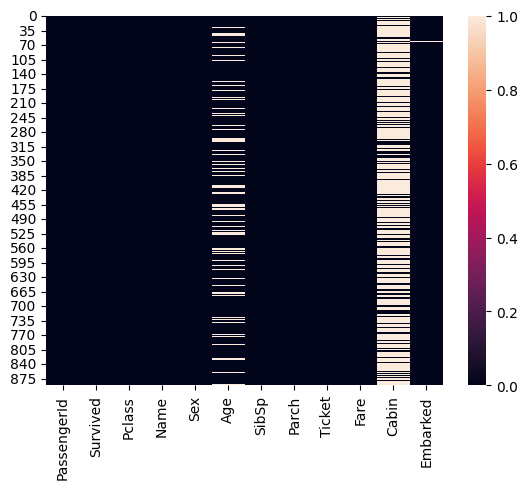

In [7]:
sns.heatmap(df.isnull())
plt.show()

Removing Missing Values 


In [8]:
mean_age=df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [9]:
mode_cabin=df['Cabin'].mode()[0]
df['Cabin'].fillna(mode_cabin, inplace=True)

mode_embarked=df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

In [10]:
missing_values_new=df.isnull().sum()
missing_values_new

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

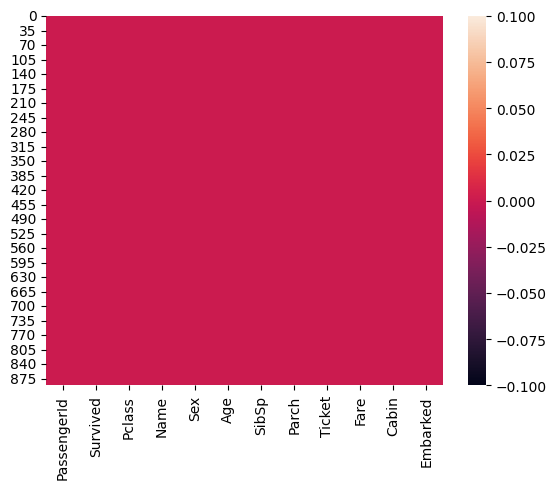

In [11]:
sns.heatmap(df.isnull())
plt.show()

<Axes: >

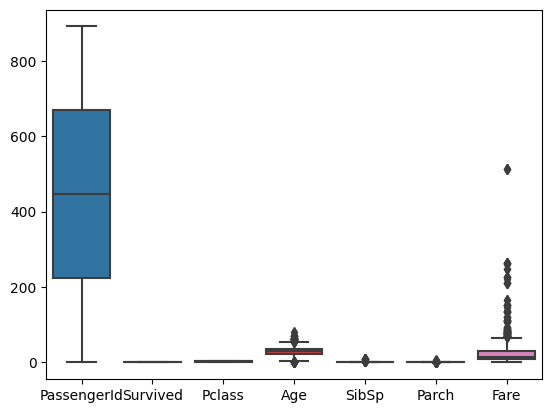

In [33]:
sns.boxplot(df)

Identify Outliers

C:\Users\USER\AppData\Local\Temp\ipykernel_13732\3572667266.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\USER\AppData\Local\Temp\ipykernel_13732\3572667266.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


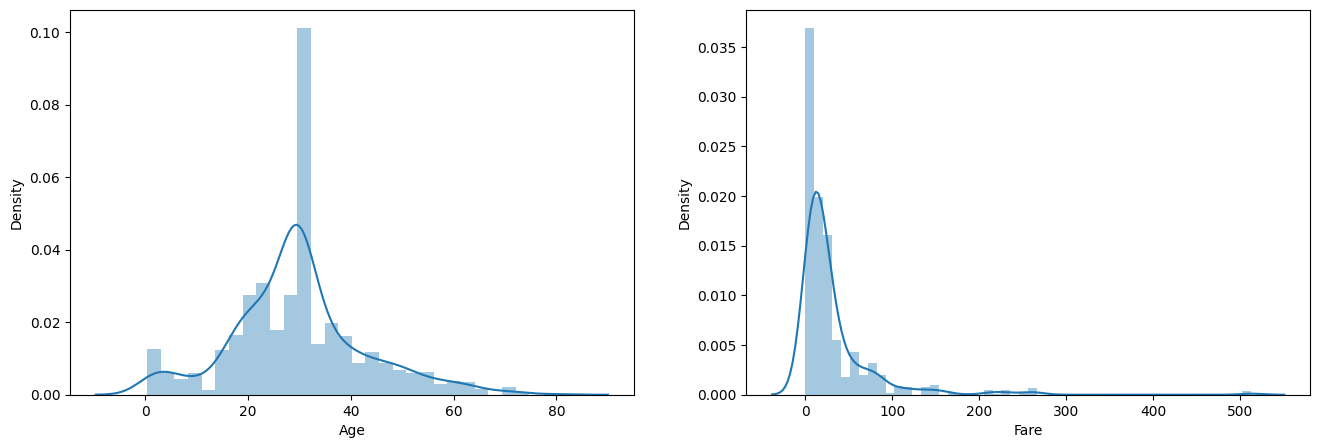

In [12]:
# numerical_columns=df.select_dtypes(include=[np.number])
# numerical_columns
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])


plt.subplot(1,2,2)
sns.distplot(df['Fare'])
plt.show()

In [13]:
print("mean value of Fare",df['Fare'].mean())
print("standard deviation of Fare",df['Fare'].std())
print("maximum of Fare",df['Fare'].max())
print("minimum of Fare",df['Fare'].min())

mean value of Fare 32.204207968574636
standard deviation of Fare 49.6934285971809
maximum of Fare 512.3292
minimum of Fare 0.0


In [14]:
upper_limit=df['Fare'].mean() + 3*df["Fare"].std()
upper_limit

181.2844937601173

In [15]:
lower_limit=df['Fare'].mean()-3*df['Fare'].std()
lower_limit

-116.87607782296804

In [16]:
df[(df['Fare']>182) | (df['Fare']< -166)]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,B96 B98,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,B96 B98,C
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,C23 C25 C27,S


<Axes: >

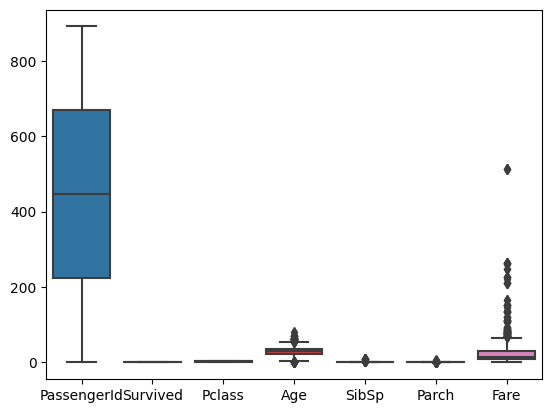

In [32]:
sns.boxplot(df)

Outliers removing from Fare column

In [17]:
new_df= df[(df['Fare']<182) & (df['Fare']>-116)]
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


<Axes: >

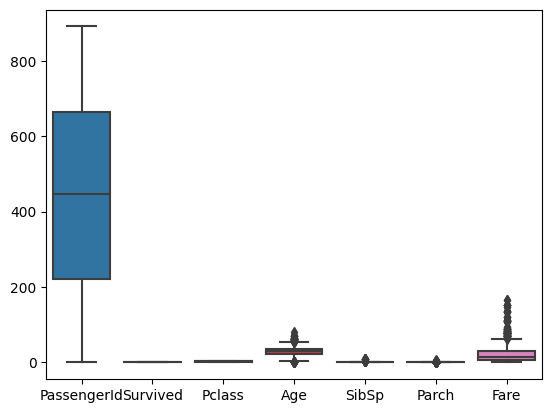

In [18]:
sns.boxplot(new_df)

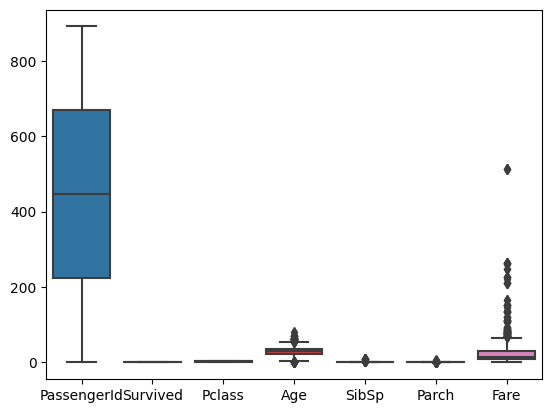

In [19]:
sns.boxplot(data=df)
plt.show()

In [20]:
df['Age'].skew()

0.4344880940129925

In [21]:
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

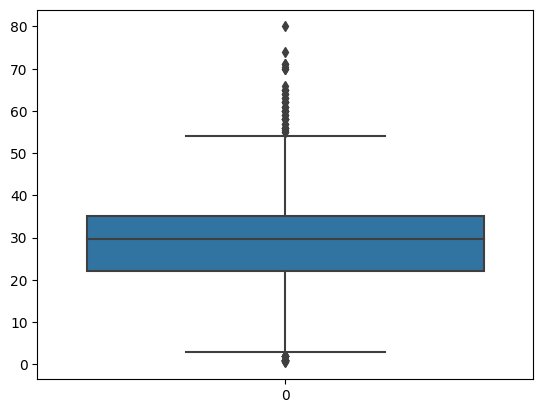

In [22]:
sns.boxplot(df['Age'])

In [23]:
#caluculate IQR
percentile25=df['Age'].quantile(0.25)
percentile75=df['Age'].quantile(0.75)

In [24]:
iqr=percentile75-percentile25

In [25]:
upper_limit_Age=percentile75 +(1.5*iqr)
lower_limit_Age=percentile25-(1.5*iqr)

In [26]:
print("upper limit",upper_limit_Age)
print("lower limit",lower_limit_Age)

upper limit 54.5
lower limit 2.5


Findout Outliers

In [27]:
df[(df['Age']>upper_limit_Age) | (df['Age']<lower_limit_Age)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,B96 B98,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,B96 B98,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,B96 B98,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,B96 B98,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,B96 B98,S
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,B96 B98,S


In [28]:
new_df=df[(df['Age']<upper_limit_Age) & (df['Age']>lower_limit_Age)]
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [29]:
new_df.shape

(825, 12)

C:\Users\USER\AppData\Local\Temp\ipykernel_13732\3507293846.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\USER\AppData\Local\Temp\ipykernel_13732\3507293846.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Age'])


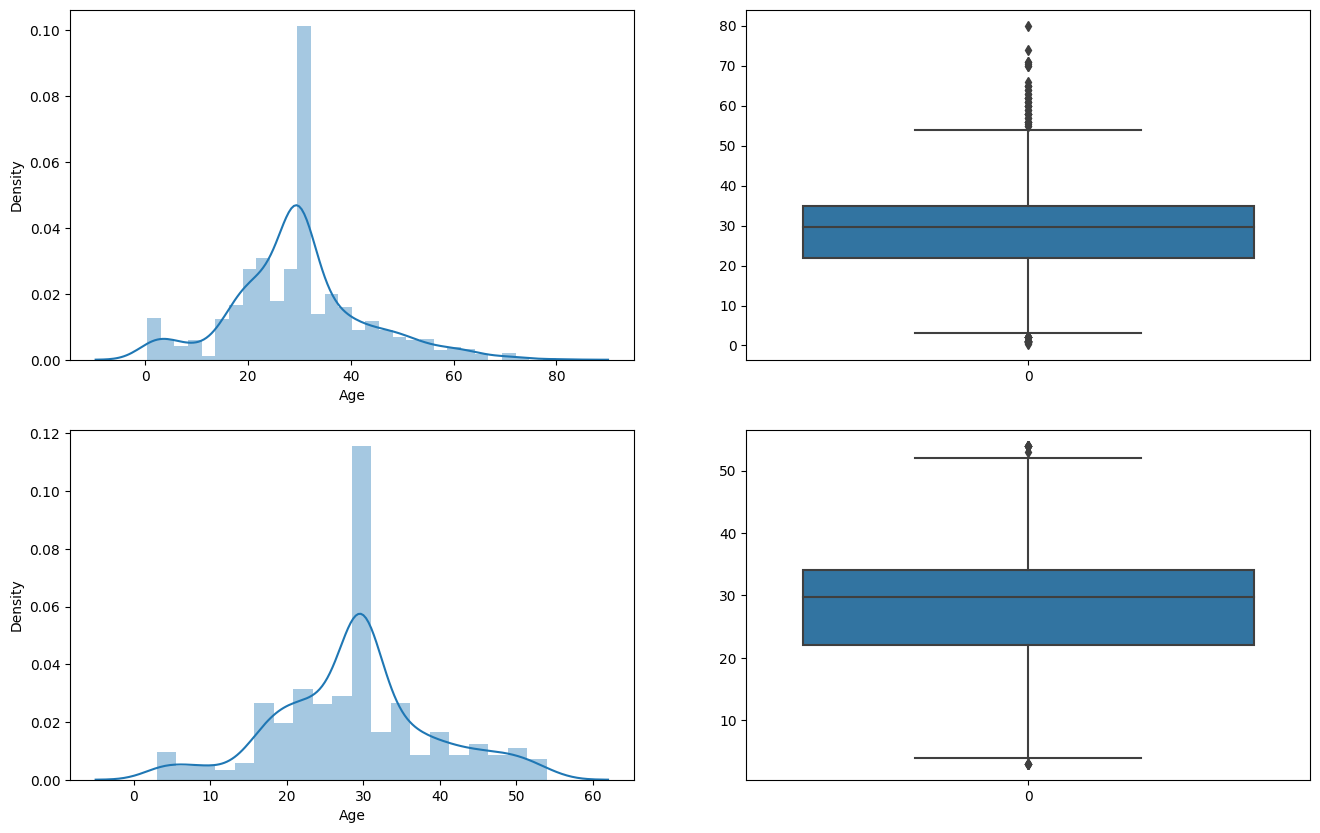

In [30]:
#comparing
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(df['Age'])

plt.subplot(2,2,2)
sns.boxplot(df['Age'])

plt.subplot(2,2,3)
sns.distplot(new_df['Age'])

plt.subplot(2,2,4)
sns.boxplot(new_df['Age'])

plt.show()

<Axes: >

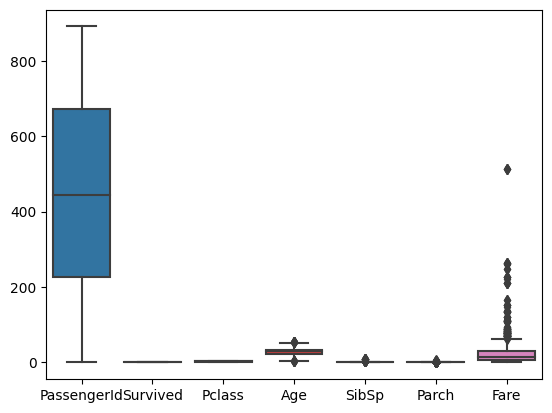

In [31]:
sns.boxplot(new_df)